In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
!ls

clean_tweet_subc_withuser.csv	       output_CNN.csv
description_old.txt		       output_ml_lr.csv
description.txt			       output_rnn_subc_NI.ipynb
GoogleNews-vectors-negative300.bin.gz  test_clean_c.csv
ml_cnn_subc.ipynb


In [3]:
df = pd.read_csv('clean_tweet_subc_withuser.csv')

In [4]:
df.head()

,id,text,subc
0,90194,user user go home you re drunk user,0
1,97670,user liberals are all kookoo,1
2,52415,user was literally just talking about this lol...,2
3,13384,user canada doesn need another cuck we already...,0
4,28414,user you are lying corrupt traitor nobody want...,0


In [5]:
df.head(10)

,id,text,subc
0,90194,user user go home you re drunk user,0
1,97670,user liberals are all kookoo,1
2,52415,user was literally just talking about this lol...,2
3,13384,user canada doesn need another cuck we already...,0
4,28414,user you are lying corrupt traitor nobody want...,0
5,28195,user user user gun control that is all these k...,1
6,56117,user user user user lol throwing the bullshit ...,0
7,12681,user user kind of like when conservatives wann...,2
8,82904,user user da fuck is going on people there the...,2
9,77665,user tbh these days just do not like people in...,0


In [6]:
z = { 0 : 'IND' ,1 : 'OTH' , 2 : 'GRP'}
df['subc'] = df.subc.map(z)


In [7]:
df.head()

,id,text,subc
0,90194,user user go home you re drunk user,IND
1,97670,user liberals are all kookoo,OTH
2,52415,user was literally just talking about this lol...,GRP
3,13384,user canada doesn need another cuck we already...,IND
4,28414,user you are lying corrupt traitor nobody want...,IND


In [8]:
df = df[pd.notnull(df['subc'])]

In [9]:
print(df['text'].apply(lambda x: len(x.split(' '))).sum())

89070


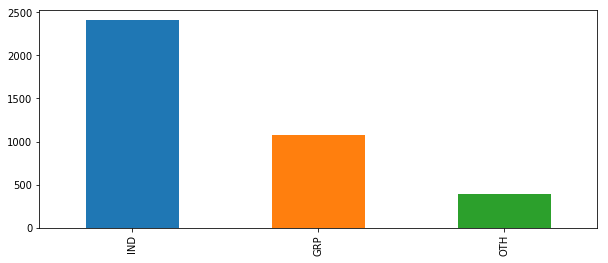

In [10]:
my_tags = ['IND','OTH','GRP']
plt.figure(figsize=(10,4))
df.subc.value_counts().plot(kind='bar');

In [11]:
def print_plot(index):
    example = df[df.index == index][['text', 'subc']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

print_plot(10)

the only thing the democrats have is lying and stalling to stop trump from being what have they done for you lately
Tag: GRP


In [12]:
X = df.text
y = df.subc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6829896907216495
             precision    recall  f1-score   support

        IND       0.75      0.03      0.06        89
        OTH       0.68      1.00      0.81       262
        GRP       0.00      0.00      0.00        37

avg / total       0.63      0.68      0.56       388



/home/preeti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [160]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7242268041237113
             precision    recall  f1-score   support

        IND       0.58      0.44      0.50        89
        OTH       0.75      0.92      0.83       262
        GRP       0.00      0.00      0.00        37

avg / total       0.64      0.72      0.68       388



/home/preeti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [161]:
df_test = pd.read_csv('test_clean_c.csv')

In [137]:
y_train

912     IND
594     IND
564     GRP
1822    IND
2020    IND
2649    IND
2991    IND
3396    OTH
3311    IND
3427    IND
1993    GRP
1940    IND
3623    IND
1537    IND
1025    IND
1272    OTH
3098    OTH
2920    IND
676     GRP
2721    IND
3011    IND
871     IND
2037    IND
2698    IND
58      GRP
76      IND
3264    IND
1662    IND
655     GRP
2091    GRP
       ... 
955     IND
1215    GRP
2433    IND
2853    OTH
3485    GRP
1515    GRP
2391    IND
769     IND
3380    IND
1685    IND
130     IND
3735    GRP
2919    IND
3171    IND
3444    IND
2135    IND
1482    GRP
330     IND
1238    IND
466     IND
2169    IND
1638    IND
3092    GRP
3772    IND
1095    IND
1130    GRP
1294    IND
860     GRP
3507    GRP
3174    GRP
Name: subc, Length: 3488, dtype: object

In [138]:
df_test.head()

,id,text
0,15923,democrats support antifa muslim brotherhood ms...
1,60133,unity demo to oppose the far right in enough i...
2,83681,what the fuck did he do this time
3,65507,user do you get the feeling he is kissing user...
4,34263,he is liar like the rest of the


In [139]:
X_test = df_test.text

In [140]:
y_pred = logreg.predict(X_test)

In [141]:
y_pred

array(['IND', 'GRP', 'IND', 'IND', 'IND', 'GRP', 'IND', 'IND', 'IND',
       'IND', 'IND', 'IND', 'IND', 'GRP', 'IND', 'IND', 'GRP', 'GRP',
       'OTH', 'GRP', 'OTH', 'GRP', 'IND', 'GRP', 'IND', 'IND', 'GRP',
       'GRP', 'IND', 'IND', 'IND', 'GRP', 'IND', 'IND', 'GRP', 'GRP',
       'IND', 'IND', 'IND', 'GRP', 'IND', 'GRP', 'GRP', 'GRP', 'GRP',
       'IND', 'GRP', 'GRP', 'GRP', 'GRP', 'IND', 'IND', 'IND', 'GRP',
       'IND', 'IND', 'GRP', 'IND', 'IND', 'OTH', 'GRP', 'IND', 'GRP',
       'OTH', 'IND', 'IND', 'IND', 'IND', 'GRP', 'IND', 'IND', 'OTH',
       'IND', 'IND', 'OTH', 'OTH', 'IND', 'IND', 'IND', 'IND', 'IND',
       'GRP', 'IND', 'IND', 'GRP', 'IND', 'IND', 'IND', 'IND', 'IND',
       'IND', 'GRP', 'IND', 'GRP', 'IND', 'GRP', 'GRP', 'IND', 'IND',
       'IND', 'IND', 'IND', 'GRP', 'IND', 'GRP', 'IND', 'IND', 'IND',
       'OTH', 'OTH', 'IND', 'OTH', 'IND', 'IND', 'IND', 'OTH', 'IND',
       'IND', 'IND', 'GRP', 'IND', 'IND', 'GRP', 'GRP', 'IND', 'IND',
       'GRP', 'IND',

In [142]:
len(y_pred)

213

In [143]:
cdf = pd.DataFrame({'id':df_test.id,'sentiment': y_pred})

In [144]:
cdf.head()

,id,sentiment
0,15923,IND
1,60133,GRP
2,83681,IND
3,65507,IND
4,34263,IND


In [145]:
cdf.sentiment.value_counts()

IND    132
GRP     60
OTH     21
Name: sentiment, dtype: int64

In [146]:
cdf.to_csv('output_ml_lr.csv',header=None , index=False, encoding='utf-8')

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7036082474226805
             precision    recall  f1-score   support

        IND       0.54      0.58      0.56        89
        OTH       0.82      0.82      0.82       262
        GRP       0.23      0.19      0.21        37

avg / total       0.70      0.70      0.70       388



In [16]:
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [17]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [18]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [19]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

/home/preeti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  
/home/preeti/.local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['subc'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.subc))
print(classification_report(test.subc, y_pred,target_names=my_tags))

accuracy 0.6930352536543423
             precision    recall  f1-score   support

        IND       0.57      0.55      0.56       302
        OTH       0.77      0.85      0.81       743
        GRP       0.20      0.10      0.14       118

avg / total       0.66      0.69      0.67      1163



In [21]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df.text, df.subc, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [22]:
all_data[:2]

[TaggedDocument(words=['user', 'user', 'but', 'you', 'are', 'still', 'going', 'to', 'jail', 'tho'], tags=['Train_0']),
 TaggedDocument(words=['user', 'user', 'has', 'the', 'same', 'lack', 'of', 'morals', 'as', 'her', 'mother', 'abortion', 'is', 'murder'], tags=['Train_1'])]

In [23]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 3876/3876 [00:00<00:00, 3440660.81it/s]


In [24]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [25]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6680997420464316
             precision    recall  f1-score   support

        IND       0.52      0.48      0.50       319
        OTH       0.74      0.85      0.79       730
        GRP       0.18      0.07      0.10       114

avg / total       0.63      0.67      0.64      1163



In [26]:
y_pred

array(['IND', 'GRP', 'GRP', ..., 'GRP', 'IND', 'IND'], dtype=object)

In [27]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.callbacks import TensorBoard


train_size = int(len(df) * .85)
train_posts = df['text'][:train_size]
train_tags = df['subc'][:train_size]

test_posts = df['text'][train_size:]
test_tags = df['subc'][train_size:]

max_words = 100
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 10



# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
validation_split=0.1,callbacks=[tbCallBack])

Using TensorFlow backend.


Train on 2964 samples, validate on 330 samples
Epoch 1/10
2964/2964 [==============================] - 1s 173us/step - loss: 0.8423 - acc: 0.6535 - val_loss: 0.7418 - val_acc: 0.6939
Epoch 2/10
2964/2964 [==============================] - 0s 33us/step - loss: 0.7323 - acc: 0.7055 - val_loss: 0.7334 - val_acc: 0.6939
Epoch 3/10
2964/2964 [==============================] - 0s 34us/step - loss: 0.6983 - acc: 0.7206 - val_loss: 0.7278 - val_acc: 0.7030
Epoch 4/10
2964/2964 [==============================] - 0s 33us/step - loss: 0.6761 - acc: 0.7284 - val_loss: 0.7283 - val_acc: 0.7000
Epoch 5/10
2964/2964 [==============================] - 0s 33us/step - loss: 0.6536 - acc: 0.7335 - val_loss: 0.7364 - val_acc: 0.7121
Epoch 6/10
2964/2964 [==============================] - 0s 33us/step - loss: 0.6271 - acc: 0.7453 - val_loss: 0.7345 - val_acc: 0.7091
Epoch 7/10
2964/2964 [==============================] - 0s 33us/step - loss: 0.5982 - acc: 0.7601 - val_loss: 0.7429 - val_acc: 0.7000
Epoch 8

In [28]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

582/582 [==============================] - 0s 14us/step
Test accuracy: 0.6907216494845361


In [29]:
model.predict(x_test)

array([[0.02284376, 0.94821   , 0.02894619],
       [0.26473713, 0.38177648, 0.35348642],
       [0.3253674 , 0.5271307 , 0.14750181],
       ...,
       [0.23476756, 0.6208037 , 0.14442867],
       [0.3450487 , 0.6204059 , 0.03454536],
       [0.4642235 , 0.32930404, 0.20647246]], dtype=float32)

In [30]:
train_tags

0       IND
1       OTH
2       GRP
3       IND
4       IND
5       OTH
6       IND
7       GRP
8       GRP
9       IND
10      GRP
11      IND
12      GRP
13      GRP
14      IND
15      OTH
16      IND
17      IND
18      IND
19      IND
20      IND
21      IND
22      OTH
23      GRP
24      IND
25      IND
26      IND
27      IND
28      GRP
29      IND
       ... 
3264    IND
3265    IND
3266    IND
3267    IND
3268    GRP
3269    IND
3270    IND
3271    GRP
3272    GRP
3273    IND
3274    IND
3275    OTH
3276    IND
3277    GRP
3278    IND
3279    GRP
3280    GRP
3281    IND
3282    GRP
3283    IND
3284    IND
3285    OTH
3286    IND
3287    IND
3288    IND
3289    IND
3290    GRP
3291    IND
3292    IND
3293    IND
Name: subc, Length: 3294, dtype: object

In [31]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [177]:
'''010 --> ind'''
'''001 --> oth'''
'''100 --> grp'''

'100 --> grp'

In [178]:
df_test = pd.read_csv('test_clean_c.csv')

In [179]:
df_test.head()

,id,text
0,15923,democrats support antifa muslim brotherhood ms...
1,60133,unity demo to oppose the far right in enough i...
2,83681,what the fuck did he do this time
3,65507,user do you get the feeling he is kissing user...
4,34263,he is liar like the rest of the


In [180]:
test_posts = df_test['text'][:]

In [181]:
x_test = tokenize.texts_to_matrix(test_posts)

In [185]:
 q  = model.predict(x_test)

In [183]:
len(x_test)

213

In [184]:
def res_gen(predsent):
  res = []
  for item in predsent :
    if (item[0] > item[1]) and  (item[0] > item[2]) :
      res.append(2)
    else :
        if (item[1] > item[0]) and  (item[1] > item[2]) :
            res.append(0)
        else :
            res.append(1)
  return(res) 

In [188]:
p = res_gen(q)

In [187]:
q

array([[0.6866158 , 0.1036248 , 0.2097594 ],
       [0.24940978, 0.48272344, 0.2678668 ],
       [0.03518369, 0.94543475, 0.01938157],
       [0.01973   , 0.9478105 , 0.03245944],
       [0.04804545, 0.88348883, 0.06846579],
       [0.22455381, 0.74412096, 0.03132525],
       [0.04733057, 0.9036822 , 0.04898724],
       [0.14672036, 0.59648144, 0.2567982 ],
       [0.04568585, 0.910112  , 0.04420216],
       [0.02132814, 0.96610826, 0.01256358],
       [0.2489672 , 0.63317657, 0.1178562 ],
       [0.01753242, 0.96121943, 0.02124825],
       [0.44564942, 0.3561465 , 0.19820406],
       [0.2729648 , 0.58882535, 0.13820991],
       [0.17963886, 0.6384849 , 0.18187623],
       [0.11164216, 0.84416956, 0.04418829],
       [0.8481837 , 0.1123657 , 0.0394506 ],
       [0.05708171, 0.834632  , 0.10828634],
       [0.1880907 , 0.58884656, 0.22306274],
       [0.31897163, 0.47379008, 0.20723826],
       [0.4542991 , 0.50809103, 0.0376099 ],
       [0.42239335, 0.21240401, 0.36520258],
       [0.

In [189]:
out_df = pd.DataFrame({'id':df_test.id, 'sentiment':p})
out_df.head()

,id,sentiment
0,15923,2
1,60133,0
2,83681,0
3,65507,0
4,34263,0


In [190]:
z = {0 : 'IND',1 :'OTH' , 2 : 'GRP'}
out_df['sentiment'] = out_df.sentiment.map(z)

In [191]:
out_df.sentiment.value_counts()

IND    157
GRP     55
OTH      1
Name: sentiment, dtype: int64

In [192]:
out_df.to_csv('output_NN.csv',header=None , index=False, encoding='utf-8')

In [193]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               51712     
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1539      
_________________________________________________________________
activation_6 (Activation)    (None, 3)                 0         
Total params: 53,251
Trainable params: 53,251
Non-trainable params: 0
_________________________________________________________________
